In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpecFromSubplotSpec

import networkx as nx

import os
import os.path as op

import importlib

import dgsp
import graph_examples as dgsp_graphs
import plotting as dgsp_plot

import bimod_plots as plot

In [2]:
def bimod_proj(
        matrix, ax, vector_id = 0, directed_edges = True, node_clusers = None, **kwargs
        ):

    # Building the modularity matrix
    modmat = dgsp.modularity_matrix(matrix, null_model="outin")

    U, S, Vh = dgsp.sorted_SVD(modmat, **kwargs)
    V = Vh.T

    n_nodes = matrix.shape[0]
    n_per_com = n_nodes // 4

    graph_pos = {i: (U[i, vector_id], V[i, vector_id]) for i in range(n_nodes)}

    if node_clusers is None:
        node_clusers = np.ones(n_nodes)

    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))

    if directed_edges:
        graph = nx.DiGraph(matrix)
    else:
        graph = nx.Graph(matrix)

    nx.draw_networkx_edges(graph, pos=graph_pos, alpha=0.02, ax=ax)

    cmap = plt.get_cmap("plasma", int(node_clusers.max() + 1))
    colors = [cmap(int(i)) for i in node_clusers]

    ax.scatter(
        U[:, vector_id],
        V[:, vector_id],
        s=200,
        color=colors,
        edgecolor="k",
        linewidth=2,
        zorder=2,
    )

    return ax

<Axes: >

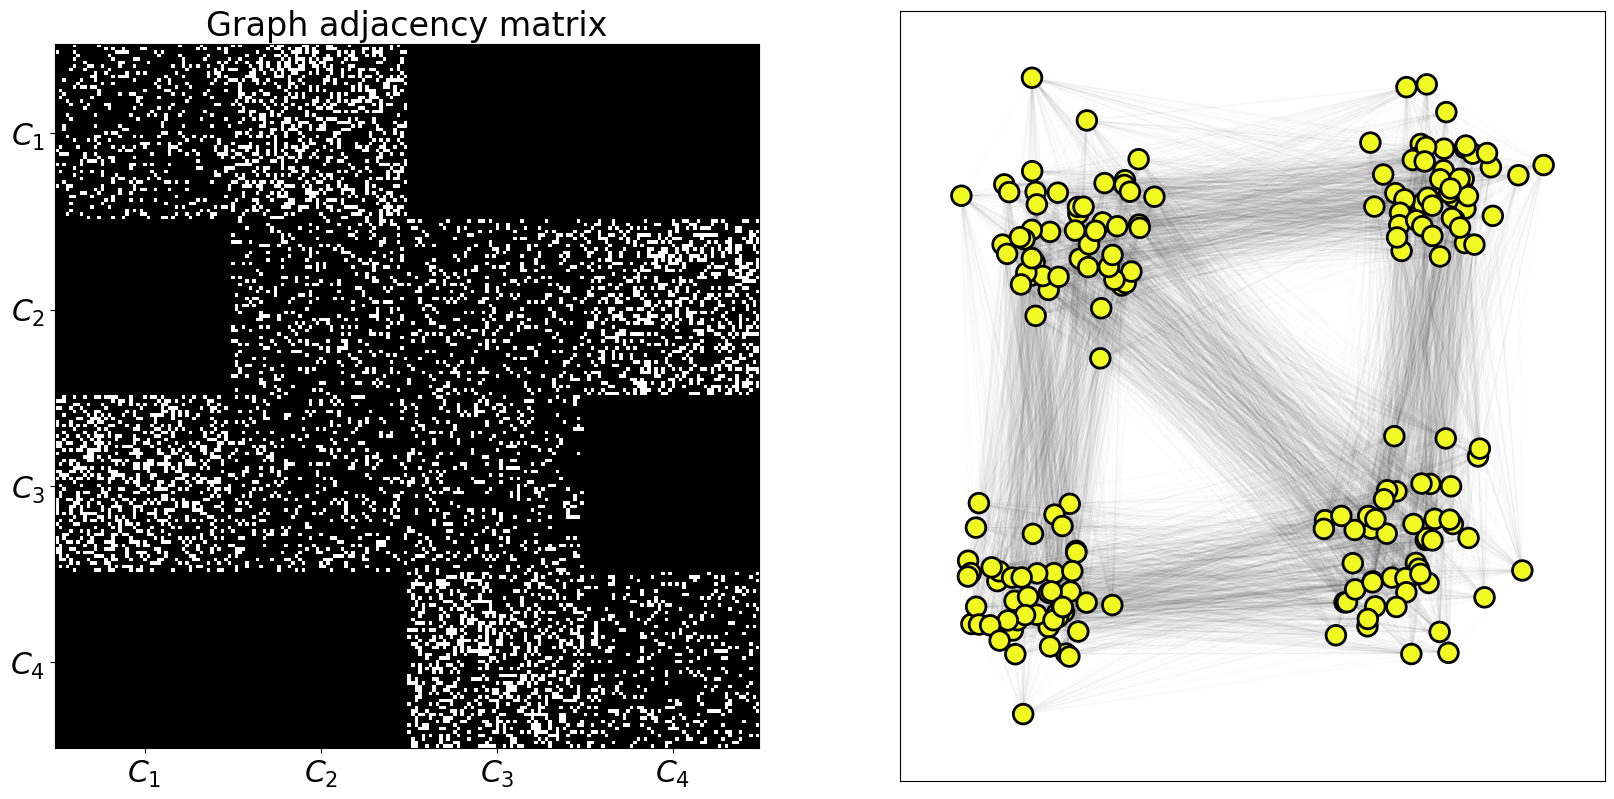

In [23]:
importlib.reload(plot)

n_per_com = 50
density_value = .3
eig_id = 0

write_s = True
for_overleaf = True

# Building the graph
graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       density_value, density_value, density_value],
                                      #connect_density=[1, 1, 0, 1, 1, 1],
                                      connect_out_prob=[1, 0, 0, 0.5, 1, 0], seed=1234)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

plot.plot_adjacency(graph, ax=axes[0], use_cmap=False)
#plot.plot_graph_embedding(graph, ax=axes[1], vector_id=0, directed_edges=False, use_cmap=False)
bimod_proj(graph, ax=axes[1], vector_id=0, directed_edges=False)

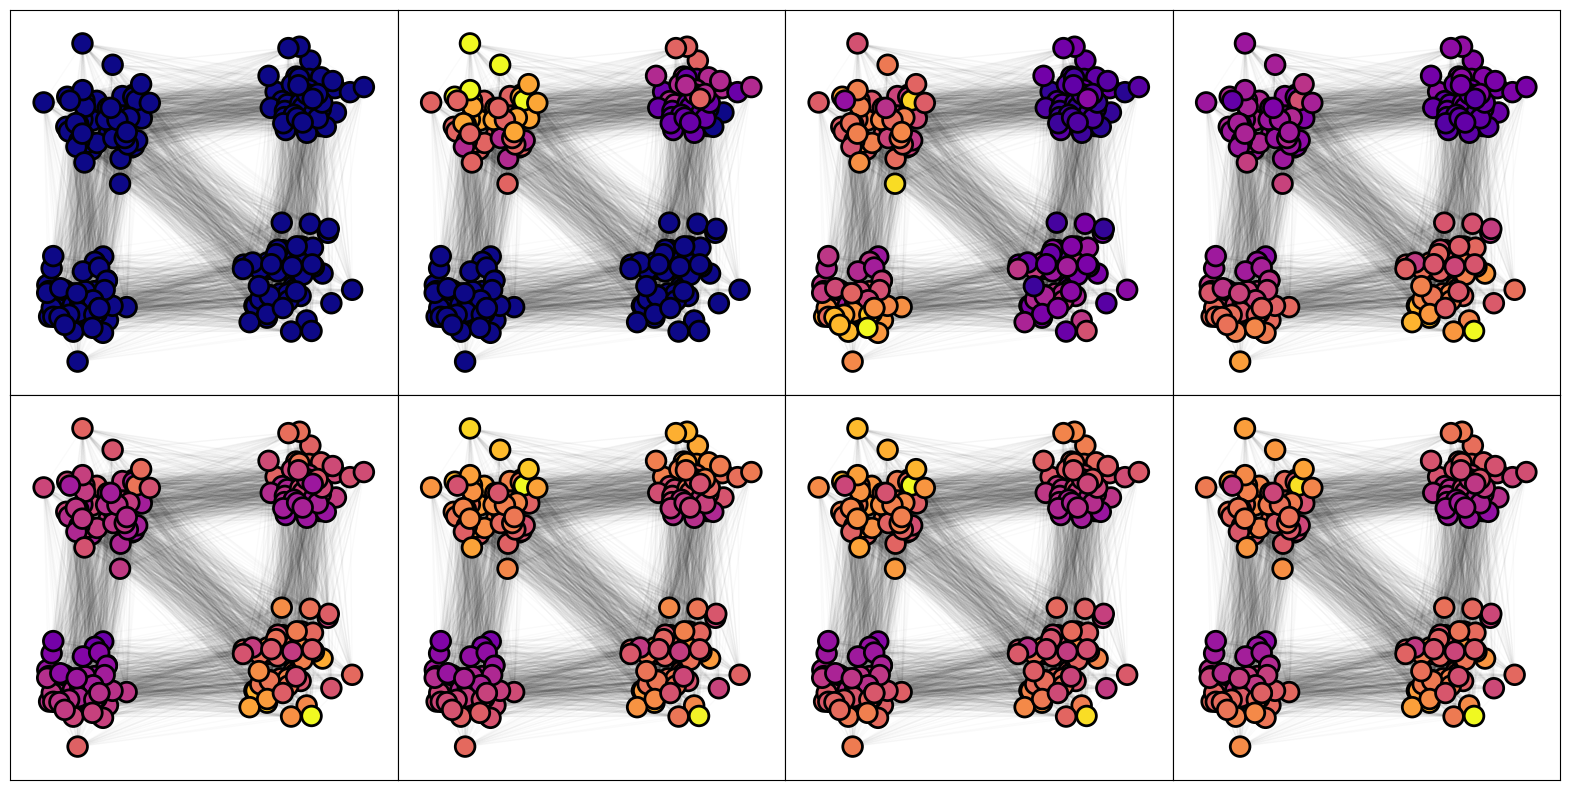

In [25]:
impulse = np.zeros(graph.shape[0], dtype=int)
impulse[:n_per_com] = 1
#impulse[10] = 1

n_times = 8

# Compute the graph signal
#signal = impulse @ graph
fig, axes = plt.subplots(ncols=4, nrows=((n_times-1)//4+1), figsize=(5*4, ((n_times-1)//4+1)*5), gridspec_kw={"wspace": 0, "hspace": 0})

axes = axes.flatten()

graph_norm = 100*graph/graph.sum()

signal = 100*impulse/len(impulse)
for i in range(n_times):
    bimod_proj(graph, ax=axes[i], vector_id=0, directed_edges=False, node_clusers=signal)
    signal = signal @ graph
    signal = 100*signal/len(signal)

